## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>BÀI 7. THUẬT TOÁN SẮP XẾP (3)</center>

In [4]:
# run this cell FIRST
import matplotlib.pyplot as plt

def show_list(arr, title=''):
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.bar(range(len(arr)), arr)
    ax.set_title(title)
    ax.set_xlabel('index')
    ax.set_xticks(range(len(arr)))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# 1. Counting Sort

**Bài toán**: Cho một dãy gồm *0 < n < 10<sup>6</sup>* số nguyên, mỗi số có giá trị trong khoảng [0, 99], sắp xếp dãy trên theo thứ tự tăng dần.

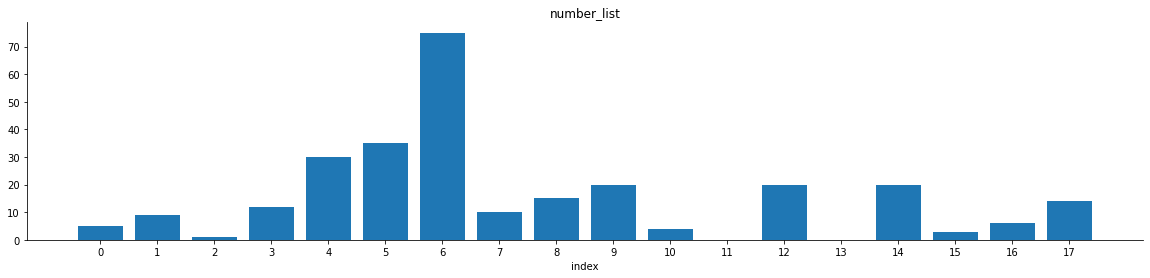

In [5]:
number_list = [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
show_list(number_list, title='number_list')

Chú ý điểm đặc biệt của bài toán trên: mỗi phần tử trong dãy là một số nguyên có giá trị từ 0 đến 99, có nghĩa là ta chỉ có tối đa 100 giá trị riêng biệt trong dãy.  
Counting Sort sử dụng đặc tính này của dữ liệu để làm nền tảng cho thuật toán.  

**Cách tiếp cận** của Counting Sort:
1. Duyệt qua dãy để đếm số lần xuất hiện của từng giá trị.
2. Sử dụng các giá trị đếm được để đưa các phần tử vào dãy mới theo thứ tự đã sắp xếp.

**Ví dụ**: Ta cần sắp xếp dãy [1, 4, 1, 2, 7, 5, 2] chứa các giá trị từ 0 đến 7.  
Bước 1. Tạo mảng *count* chứa số lần xuất hiện của mỗi phần tử:
<pre>
       i:  0  1  2  3  4  5  6  7
count[i]:  0  2  2  0  1  1  0  1
</pre>  
Bước 2. Duyệt *count* theo thứ tự từ đầu đến cuối để đưa các giá trị vào dãy mới.
<pre>
sorted_arr = []
i = 0; count[0] = 0  =>  sorted_arr = []
i = 1; count[1] = 2  =>  sorted_arr = [1, 1]
i = 2; count[2] = 2  =>  sorted_arr = [1, 1, 2, 2]
i = 3; count[3] = 0  =>  sorted_arr = [1, 1, 2, 2]
i = 4; count[4] = 1  =>  sorted_arr = [1, 1, 2, 2, 4]
i = 5; count[5] = 1  =>  sorted_arr = [1, 1, 2, 2, 4, 5]
i = 6; count[6] = 0  =>  sorted_arr = [1, 1, 2, 2, 4, 5]
i = 7; count[7] = 1  =>  sorted_arr = [1, 1, 2, 2, 4, 5, 7]
</pre> 

**Visualization**: https://visualgo.net/en/sorting, thuật toán thứ bảy.

### Code:

In [6]:
def counting_sort(arr):
    
    # trivial cases
    if len(arr) <= 1:
        return
    
    # get the maximal value as the range of counting indices
    max_val = max(arr)
 
    # count occurences of each value
    count = [0] * (max_val+1)
    for el in arr:
        count[el] += 1
 
    # traverse `count` to place the values back to `arr`
    index = 0
    for i in range(max_val+1):
        for j in range(count[i]):
            arr[index] = i
            index += 1

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


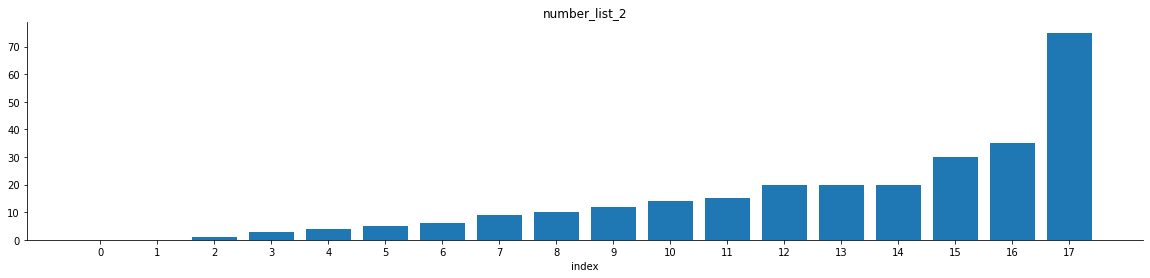

In [7]:
number_list_2 = number_list[:]

counting_sort(number_list_2)

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

**Độ phức tạp thời gian**:
- Thuật toán Counting Sort duyệt qua dãy để đếm các phần tử với độ phức tạp *O(n)*.
- Sau đó, thuật toán duyệt qua mảng *count* để đưa các phần tử vào mảng đã sắp xếp. Số phần tử của mảng *count* tương đương với giá trị lớn nhất của dãy. Gọi giá trị này là *k*, ta có độ phức tạp của bước này là *O(k+1) + O(n)* = *O(n+k)*, do ta duyệt qua cả mảng *count* và dãy đã được sắp xếp.  
- Như vậy, độ phức tạp về thời gian của thuật toán là:
  \begin{equation} O(n)+O(n+k) = O(n+k) \end{equation}

**Độ phức tạp không gian**:
- Thuật toán lưu trữ danh sách gốc với *O(n)* bộ nhớ và mảng *count* với *O(k)* bộ nhớ.
- Trong code trên, ta lưu dãy đã được sắp xếp bằng cách ghi đè lên dãy gốc, do đó ta không dùng thêm không gian nhớ cho dãy đã được sắp xếp.
- Tổng hợp, độ phức tạp về không gian của thuật toán là:
  \begin{equation} O(n) + O(k) = O(n+k) \end{equation}
  
**Đặc điểm**:
- Trong các trường hợp *n* lớn và *k* nhỏ, thuật toán Counting Sort đặc biệt nhanh hơn các thuật toán sắp xếp đã học.
- Counting Sort có tính chất đặc trưng này vì đây là thuật toán sắp xếp không dựa vào cơ chế so sánh. Tức ta không thực hiện phép so sánh giữa các phần tử trong quá trình sắp xếp.
- Tuy nhiên, Counting Sort có một nhược điểm rất lớn là chỉ hoạt động tốt trên dãy có ít giá trị riêng biệt. Ví dụ nếu dãy cần sắp xếp là các số thực với giá trị ngẫu nhiên, thuật toán này gần như không có ý nghĩa ứng dụng.

**Mở rộng**:
- Trong code trên, thuật toán chỉ chạy được với các số nguyên không âm. Tuy nhiên, Counting Sort có thể được chỉnh sửa để chạy được với số âm và các loại dữ liệu có tính chất rời rạc khác.

# 2. So Sánh Các Thuật Toán Sắp Xếp

Ta đã học các thuật toán sắp xếp với độ phức tạp khác nhau:
- O(n<sup>2</sup>): Selection Sort, Bubble Sort, Insertion Sort
- O(nlog(n)): Merge Sort; Θ(nlog(n)): Quicksort
- O(n+k): Counting Sort

Mỗi thuật toán có đặc trưng riêng về cách xử lý và yêu cầu về input.  
Do đó, mỗi thuật toán sẽ có thời gian chạy khác nhau trên dữ liệu thực tế.  

## Độ Phức Tạp & Thời Gian Chạy

Ta có thể đánh giá sự tương quan về độ phức tạp tính toán và thời gian chạy thực tế của các thuật toán bằng cách chạy đoạn code bên dưới.  
Học viên có thể thay đổi các thông số để chạy thử trên các trường hợp khác nhau.

In [8]:
%run algorithm_implementations.ipynb

import numpy as np
import time

def cal_time(func):
    start_time = time.time()
    result = func()
    real_time = time.time() - start_time
    return real_time, result

In [9]:
def test_execution_time():
    
    # change the parameters here for exploration
    test_list = [('    O(n+k) Algorithm: Counting Sort', counting_sort),  # requires integer inputs, starting from 0
                 ('O(nlog(n)) Algorithm: Merge Sort   ', merge_sort),
                 ('Θ(nlog(n)) Algorithm: Quicksort    ', quick_sort),
                 ('    O(n^2) Algorithm: Bubble Sort  ', bubble_sort),
                 ('  Python Built-in sorted() function', sorted)]
    arr_size = 10000
    max_val = 1000
    
    arr = list(np.random.randint(0, max_val, arr_size))
    
    print('Testing execution time of sorting algorithms on random arrays | n={}, k={}'.format(arr_size, max_val))
    for name, func in test_list:
        arr2 = arr[:]
        print('{} ==== {} secs'.format(name, cal_time(lambda: func(arr2))[0]))


# driver code
test_execution_time()

Testing execution time of sorting algorithms on random arrays | n=10000, k=1000
    O(n+k) Algorithm: Counting Sort ==== 0.003989458084106445 secs
O(nlog(n)) Algorithm: Merge Sort    ==== 0.046874284744262695 secs
Θ(nlog(n)) Algorithm: Quicksort     ==== 0.027124643325805664 secs
    O(n^2) Algorithm: Bubble Sort   ==== 9.36295223236084 secs
  Python Built-in sorted() function ==== 0.001995086669921875 secs


**Nhận xét**:  

Với n=10000 và k=1000, ta có thể tạm tính:
<pre>
n+k     = 11000
nlog(n) = 40000
n^2     = 100000000
</pre>

Giá trị tương đối của các kết quả này khớp với thời gian chạy thực tế mà ta tính toán được: Counting Sort < Merge Sort, Quicksort < Bubble Sort.  
Merge Sort và Quicksort tuy tương đồng nhau về độ phức tạp nhưng có khác biệt trong thời gian chạy thực tế.

**Thuật toán trong hàm sorted()**:  

Thuật toán được dùng trong hàm *sorted()* có sẵn của Python là thuật toán Timsort (https://en.wikipedia.org/wiki/Timsort). Đây là một dạng thuật toán lai kết hợp giữa Merge Sort và Insertion Sort. Thuật toán này có độ phức tạp trung bình là Θ(nlog(n)).  

Tuy nhiên, ta có thể thấy thời gian chạy của hàm *sorted()* nhanh hơn hẳn các thuật toán O(nlog(n)) phía trên. Có hai lý do chính là cho việc này là:
- Hàm được tối ưu hóa bằng nhiều kỹ thuật khác nhau chứ không chỉ đơn thuần là kết hợp Merge Sort và Insertion Sort.
- Hàm được viết dưới ngôn ngữ C để tối ưu hóa thời gian thực chạy.

**Kết luận**:
- Độ phức tạp của một thuật toán không thể hiện chính xác thời gian chạy trên thực tế, nhưng đó là một công cụ hữu dụng để ta phân tích độ hiệu quả về mặt thời gian và dữ liệu.
- Các thuật toán tương đồng nhau về độ phức tạp có thể có khác biệt lớn về thời gian chạy thực tế, nhờ vào các yếu tố như cách xử lý, tối ưu hóa và môi trường chạy.

# 3. Thực Hành

## 3.1. Counting Sort Trên Số Âm

**Yêu cầu**: Cho một dãy gồm *0 < n < 10<sup>6</sup>* số nguyên, mỗi số có giá trị trong khoảng [-99, 99]. Hãy chỉnh sửa thuật toán Counting Sort để sắp xếp dãy trên theo thứ tự tăng dần.  

*Gợi ý*: Ta có thể xem khoảng giá trị [-99, 99] tương tự như khoảng [0, 198] bằng cách cộng 99 vào mỗi phần tử.

In [10]:
number_list = [5, 9, -1, 12, -30, 35, -75, 10, 15, -20, 4, 0, -20, 0, -20, -3, 6, -14]

In [11]:
def counting_sort_negative(arr):
    
    # trivial cases
    if len(arr) <= 1:
        return
    
    # get the range of counting indices
    min_val = min(arr)
    max_val = max(arr)
    val_range = max_val - min_val + 1
 
    # count occurences of each value
    count = [0] * val_range
    for el in arr:
        count[el-min_val] += 1  # subtract here...
 
    # traverse `count` to place the values back to `arr`
    index = 0
    for i in range(val_range):
        for j in range(count[i]):
            arr[index] = i + min_val  # ... then add back here
            index += 1

Before sorting: [5, 9, -1, 12, -30, 35, -75, 10, 15, -20, 4, 0, -20, 0, -20, -3, 6, -14]
After sorting:  [-75, -30, -20, -20, -20, -14, -3, -1, 0, 0, 4, 5, 6, 9, 10, 12, 15, 35]


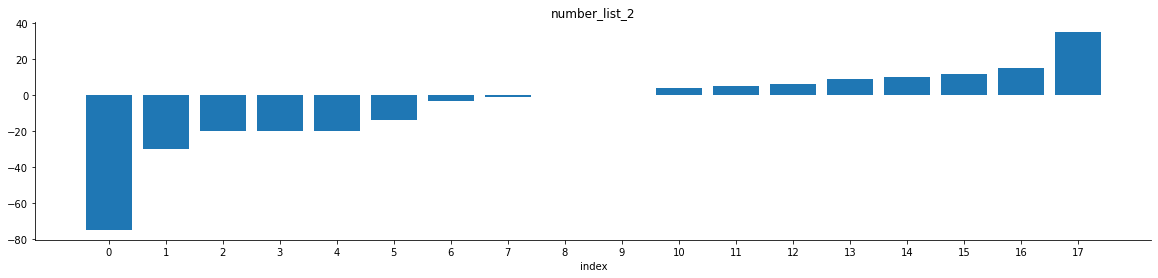

In [12]:
number_list_2 = number_list[:]

counting_sort_negative(number_list_2)

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

## 3.2. Danh Sách Điểm

Bài toán sắp xếp thường không chỉ giải quyết vấn đề sắp xếp phần tử đơn giản, mà còn sắp xếp các phần tử là object dựa theo các thuộc tính của chúng.  

**Yêu cầu**: Cho danh sách điểm của học sinh với định dạng bên dưới. Hãy sắp xếp danh sách theo thứ tự điểm Toán tăng dần.
Biết danh sách có thể có điếm của *0 < n < 10<sup>6</sup>* học sinh, mỗi điểm được làm tròn đến số nguyên từ 0 đến 10.

In [13]:
student_grade_list = [
    {'id': 984, 'math': 9, 'literature': 5},
    {'id': 12, 'math': 10, 'literature': 4},
    {'id': 324, 'math': 10, 'literature': 5},
    {'id': 890, 'math': 5, 'literature': 7},
    {'id': 223, 'math': 8, 'literature': 5},
    {'id': 543, 'math': 8, 'literature': 8},
]

In [14]:
# METHOD 1: Store indices in the `indices` array
# Use extra O(n+k) space
def counting_sort_grade_v1(arr):
    
    # trivial cases
    if len(arr) <= 1:
        return
    
    # get the range of counting indices
    val_range = 11
 
    # save indices of each value
    indices = [[] for i in range(val_range)]
    for i, grade in enumerate(arr):
        indices[grade['math']].append(i)
    
    # traverse `count` to place the values into `sorted_arr`
    sorted_arr = [None] * len(arr)
    index = 0
    for i in range(val_range):
        for original_index in indices[i]:
            sorted_arr[index] = arr[original_index]
            index += 1
            
    return sorted_arr

In [15]:
# METHOD 2: Build `next_indices` array
# Use extra O(k) space
# Can overwrite `count` to eliminate extra space, but would make the code more complex
# Reference: https://www.interviewcake.com/concept/java/counting-sort
def counting_sort_grade_v2(arr):
    
    # trivial cases
    if len(arr) <= 1:
        return
    
    # get the range of counting indices
    val_range = 11
 
    # count occurences of each value
    count = [0] * val_range
    for i, grade in enumerate(arr):
        count[grade['math']] += 1
        
    # build `next_indices`
    next_indices = [None] * val_range
    next_indices[0] = 0
    for i in range(1, val_range):
        next_indices[i] = next_indices[i-1] + count[i-1]
 
    # traverse `arr` to place the values into `sorted_arr`
    sorted_arr = [None] * len(arr)
    for grade in arr:
        sorted_arr[next_indices[grade['math']]] = grade
        next_indices[grade['math']] += 1
        
    return sorted_arr

In [16]:
student_grade_list_2 = student_grade_list[:]

student_grade_list_2 = counting_sort_grade_v2(student_grade_list_2)

print("Before sorting:")
display(student_grade_list)
print("After sorting:")
display(student_grade_list_2)

Before sorting:


[{'id': 984, 'math': 9, 'literature': 5},
 {'id': 12, 'math': 10, 'literature': 4},
 {'id': 324, 'math': 10, 'literature': 5},
 {'id': 890, 'math': 5, 'literature': 7},
 {'id': 223, 'math': 8, 'literature': 5},
 {'id': 543, 'math': 8, 'literature': 8}]

After sorting:


[{'id': 890, 'math': 5, 'literature': 7},
 {'id': 223, 'math': 8, 'literature': 5},
 {'id': 543, 'math': 8, 'literature': 8},
 {'id': 984, 'math': 9, 'literature': 5},
 {'id': 12, 'math': 10, 'literature': 4},
 {'id': 324, 'math': 10, 'literature': 5}]